# Short Time Fourier Transform

In [141]:
import numpy as np
import scipy.io as sio
from scipy import signal
from scipy.fft import fft
import matplotlib.pyplot as plt

In [2]:
mat = sio.loadmat('data/sampleEEGdata.mat')

In [7]:
EEG = mat['EEG']

In [33]:
srate = EEG['srate'][0][0][0][0]
srate

256

In [46]:
times = EEG['times'][0][0]
times.shape

(1, 640)

In [51]:
data = EEG['data'][0][0]
data.shape

(64, 640, 99)

In [56]:
pnts = EEG['pnts'][0][0][0][0]
pnts

640

Text(0, 0.5, 'Amplitude')

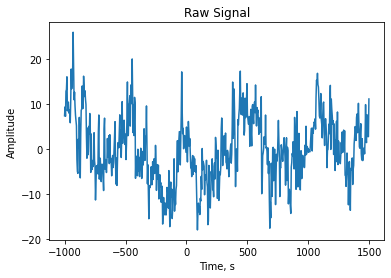

In [138]:
timewin = 500 # in ms

# convert ms to idx
timewinidx = np.round(timewin/(1000/srate)).astype(int)

# create Hann taper function
hann_win = 0.5 * (1 - np.cos(2 * np.pi * np.arange(0, timewinidx) / (timewinidx - 1)))

# detrend data to attenuate super-low frequency artifacts in FFT 
# from sampled data
d = signal.detrend(data[20,:,16])

# plot raw signal
fig, ax = plt.subplots()
ax.plot(times.reshape(-1,1), d)
ax.set_title('Raw Signal')
ax.set_xlabel('Time, s')
ax.set_ylabel('Amplitude')

# Window Function

We apply the Hann Window, defined as:

\begin{equation}
w(n)=0.5-0.5 \cos \left(\frac{2 \pi n}{M-1}\right) \quad 0 \leq n \leq M-1
\end{equation}

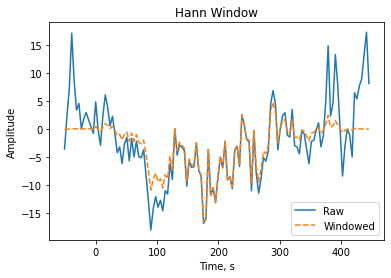

In [140]:
# compute index at time -50ms
stime = np.argmin(np.abs(times - -50))

# plot window with raw signal and STFT of it
fig, ax = plt.subplots()

ax.plot(times.reshape(-1, 1)[stime:stime+timewinidx], d[stime:stime+timewinidx], '-', label='Raw')
ax.plot(times.reshape(-1, 1)[stime:stime+timewinidx], d[stime:stime+timewinidx]*hann_win, '--', label='Windowed')
ax.set_title('Hann Window')
ax.set_xlabel('Time, s')
ax.set_ylabel('Amplitude')
ax.legend(loc=4)

In [142]:
dfft = fft(d[stime:stime+timewinidx]*hann_win)
dfft.shape

(128,)

In [143]:
dfft

array([-3.40288222e+02  -0.j        ,  2.39668627e+02+106.83453108j,
       -5.54421652e+01 -70.20566756j,  5.74656938e+00 -20.58785302j,
       -4.98223254e+01 +33.41182863j,  4.38322762e+01 +37.30873489j,
       -3.21632940e+01 -98.57742777j,  2.16173812e+01 +57.67574399j,
        8.69735328e+00 +21.33597122j, -1.28557110e-01 -47.61109207j,
        7.85061047e+00 +24.44056454j, -4.53440182e+01 +15.504082j  ,
        3.68863522e+01 -31.10852123j, -2.10416527e+01 +36.86707336j,
        1.05658651e+01 -33.94748418j, -6.07931125e+00  +6.20935714j,
        1.55343930e+01 +10.42073745j, -5.55997889e+00 -14.93040274j,
       -2.09098946e+01  -0.30356582j,  3.48711067e+01 +21.23901494j,
       -3.47989299e+01  -7.175779j  ,  2.61355057e+01 -11.31517276j,
       -1.82787382e+01  +0.5057988j ,  1.66447277e+01 +23.99632513j,
       -1.18346465e+01 -32.37452666j,  1.99178725e+00 +25.03521803j,
       -9.71805985e+00 -20.62297291j,  1.24281670e+01 +10.70018244j,
        6.57576183e+00 -18.1597880